# 전이 학습(transfer learning)
- 수만 장에 달하는 기존의 이미지에서 + 미리 학습한 가중치(weight) + 학습한 정보를 가져와 => 내 프로젝트에 활용
- 딥러닝의 데이터 양이 충분하지 않을 때 활용할 수 있는 방법
- 컴퓨터 비전, 자연어 처리 
- 예측율을 높

# 딥러닝 및 머신러닝 알고리즘

- 1)지도 학습(supervised learning) : 정답을 알려 주고 시작, lungcancer, pima, cnn (CLASS)
- 2)비지도 학습(unsupervised learning) : GAN, AutoEncoder => data 특성 찾기 

In [1]:
# https://tykimos.github.io/2017/03/08/CNN_Getting_Started/

# MRI 
- 뇌 사진을 보고 치매 환자의 뇌인지, 일반인의 뇌인지를 예측
- 각 사진마다 치매 혹은 일반인으로 클래스 =>  지도 학습
- 이미지를 분류할 것 => 컨볼루션 신경망(CNN)

- 총 280장 뇌 단면 사진 = 치매 환자 140장 + 일반인 140장
- 280개 = 160개는 train 폴더(ad[치매 환자] normal[일반인]) + 120개는 test 폴더(ad, normal)

- ImageDataGenerator() : 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함, 이미지 데이터의 수를 확장할 때 효과적
- flow_from_directory() : 폴더에 저장된 데이터를 불러

In [2]:
# test # train set folder 붙여넣기 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./225,          # 원본 영상이 0~255의 RGB값
                             # 255로 나누면 0~1의 값으로 변환=>학습 빠르고 쉬워                       
    horizontal_flip=True,    # 수평 대칭 이미지를 50% 확률로 만들어 추가
    width_shift_range=0.1,   # 전체 크기의 10% 범위에서 좌우로 이동
    height_shift_range=0.1, 
    fill_mode='nearest')     # 빈 공간 - 가장 비슷한 색으로 채우기 


In [5]:
train_generator = train_datagen.flow_from_directory('train', target_size=(150, 150), 
                                                    batch_size=5, class_mode='binary')
# train 안 ad(0) & normal(1) : 폴더명 자체를 label로 씀 

Found 160 images belonging to 2 classes.


In [6]:
# 테스트셋은 이미지 부풀리기 과정을 진행 X
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('test', target_size=(150, 150),
                                                  batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [7]:
print(len(train_generator))
# 160 / 5(batch_size)

32


In [8]:
print(len(test_generator))
# 120 / 5

24


In [9]:
# 앞서 배운 CNN 모델을 만들어 적용하기
model = Sequential()             
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [11]:
# 모델 컴파일  
model.compile(loss='sparse_categorical_crossentropy',
optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [12]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [13]:
# 모델 실행

# 옛 모델 history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=test_generator, validation_steps=4)

history = model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test)

Train for 32 steps, validate for 24 steps
Epoch 1/20
32/32 [==============================] - 4s 117ms/step - loss: 0.6947 - accuracy: 0.5063 - val_loss: 0.6897 - val_accuracy: 0.5917
Epoch 2/20
32/32 [==============================] - 3s 88ms/step - loss: 0.6825 - accuracy: 0.5562 - val_loss: 0.6861 - val_accuracy: 0.6583
Epoch 3/20
32/32 [==============================] - 3s 88ms/step - loss: 0.6984 - accuracy: 0.4875 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 3s 86ms/step - loss: 0.6949 - accuracy: 0.5125 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 3s 89ms/step - loss: 0.6838 - accuracy: 0.5813 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 3s 88ms/step - loss: 0.6771 - accuracy: 0.5750 - val_loss: 0.6563 - val_accuracy: 0.7583
Epoch 7/20
32/32 [==============================] - 3s 85ms/step - loss: 0.6604 - accuracy: 0.6750 - val_loss: 

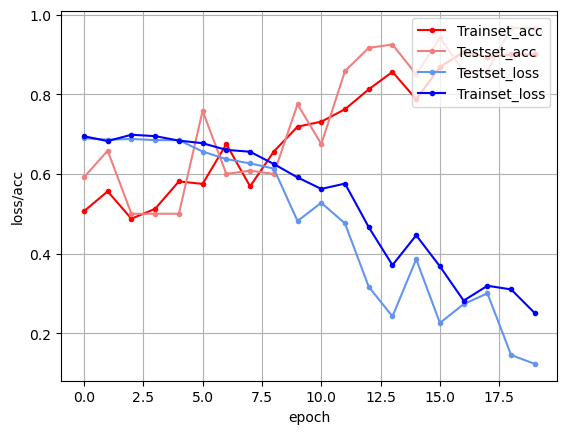

In [14]:
# 결과를 그래프로 표현하는 부분
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))  
 
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
 
plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()